In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

if locals().get("mnist") is None:
    mnist = fetch_openml("mnist_784", version=1)

if locals().get("fashion_mnist") is None:
    fashion_mnist = fetch_openml("Fashion-MNIST", version=1)


/home/patel_zeel/miniconda3/lib/python3.9/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/home/patel_zeel/miniconda3/lib/python3.9/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
x = mnist["data"].values
y = mnist["target"].values
train_cal_x, test_x, train_cal_y, test_y = train_test_split(
    x, y, test_size=10000, random_state=42, stratify=y
)
train_x, cal_x, train_y, cal_y = train_test_split(
    train_cal_x, train_cal_y, test_size=10000, random_state=42, stratify=train_cal_y
)
print(train_x.shape, cal_x.shape, test_x.shape)

(50000, 784) (10000, 784) (10000, 784)


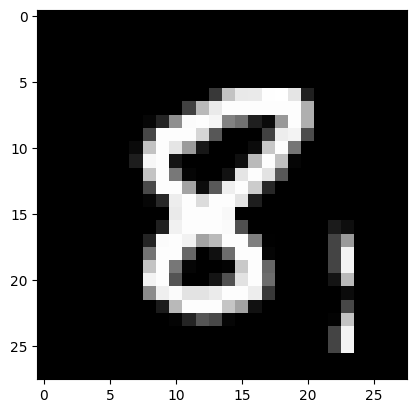

In [3]:
plt.imshow(train_x[np.random.choice(len(train_x))].reshape(28, 28), cmap="gray")

In [4]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(train_x, train_y)
y_pred = clf.predict(test_x)

print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       986
           1       0.94      0.96      0.95      1125
           2       0.87      0.83      0.85       999
           3       0.81      0.82      0.81      1020
           4       0.86      0.86      0.86       975
           5       0.82      0.81      0.81       902
           6       0.90      0.90      0.90       982
           7       0.89      0.91      0.90      1042
           8       0.82      0.80      0.81       975
           9       0.82      0.83      0.82       994

    accuracy                           0.87     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.87      0.86     10000



## Regressor to classify

In [5]:
reg = DecisionTreeRegressor()
reg.fit(train_x, train_y.astype(float) + 0.5)

DecisionTreeRegressor()

In [10]:
y_pred = (reg.predict(test_x) - 0.5).astype(int).astype(str)

print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       986
           1       0.94      0.95      0.95      1125
           2       0.82      0.79      0.81       999
           3       0.81      0.81      0.81      1020
           4       0.83      0.84      0.84       975
           5       0.78      0.79      0.78       902
           6       0.88      0.87      0.88       982
           7       0.85      0.88      0.87      1042
           8       0.76      0.73      0.74       975
           9       0.81      0.82      0.82       994

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



## Predict OOD

In [11]:
ood_x = fashion_mnist["data"].values
ood_y = fashion_mnist["target"].values
ood_x.shape, ood_y.shape

((70000, 784), (70000,))

(array(['0'], dtype=object), array([8.5]))

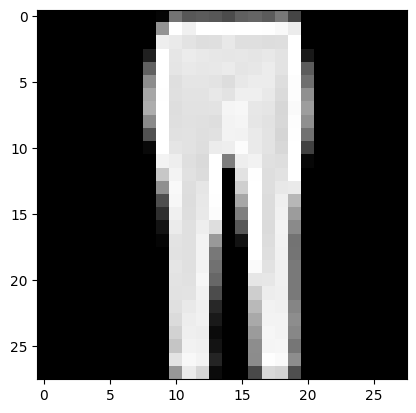

In [15]:
np.random.seed(3)
i = np.random.choice(x.shape[0])
ood_sample_x = ood_x[i]
plt.imshow(ood_sample_x.reshape(28, 28), cmap="gray")
clf.predict(ood_sample_x.reshape(1, -1)), reg.predict(ood_sample_x.reshape(1, -1))
